In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Convolutional Neural Networks
---
- Why do we care about CNN?

Images using Pixels, there is usually some relation of one pixel to the nearby pixel.

Looking at the MNIST Dataset again to visualize this concept

In [2]:
# download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

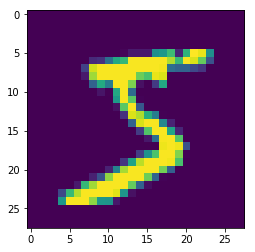

In [3]:
# plot the first image in the dataset
plt.imshow(X_train[0]);

In [4]:
# check image shape
X_train[0].shape

(28, 28)

We see the shape is 28 by 28.  Our Sea lion or any other images might not be exactly that, but we will learn a technique below to quickly bypass this problem.

In [5]:
# reshape data to fit model
X_train = X_train.reshape(60_000, 28, 28, 1) # 60_000=image_count, (28, 28)=(len, width), 1=channel (Grayscale/RGB)
X_test = X_test.reshape(10_000, 28, 28, 1)

### Categorize our target values

zeros or ones.  One is active, it is a light switch turned on for classifying that value.  In this instance there can be a limited number of ones per array (only one).

In [6]:
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Building a CNN
- Just like how a model is built using dense layers

In [7]:
# instantiate the model
model = Sequential()

# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

W1001 14:57:32.659365 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1001 14:57:32.685044 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 14:57:32.687201 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 14:57:32.700185 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.


In [8]:
# compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W1001 14:57:32.734990 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1001 14:57:32.756494 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

W1001 14:57:32.839607 4505511360 deprecation.py:323] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1001 14:57:32.884177 4505511360 deprecation_wrapper.py:119] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 28s 473us/step - loss: 0.4897 - acc: 0.9360 - val_loss: 0.0809 - val_acc: 0.9757
Epoch 2/3
60000/60000 [==============================] - 28s 462us/step - loss: 0.0633 - acc: 0.9813 - val_loss: 0.0645 - val_acc: 0.9794
Epoch 3/3
60000/60000 [==============================] - 27s 446us/step - loss: 0.0494 - acc: 0.9852 - val_loss: 0.0658 - val_acc: 0.9805


In [10]:
# predict first 4 images in the test set
preds = model.predict(X_test[:4])
print("value", np.array(["0", 1, 2, 3, 4, 5, 6, 7, 8, 9]))
np.round(preds)

value ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

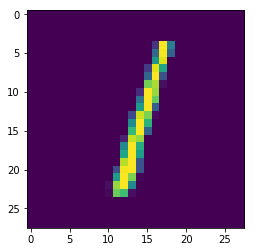

In [11]:
plt.imshow(X_test[2].reshape(28, 28));

## How Does CNN Work?

### Convolutional Layer

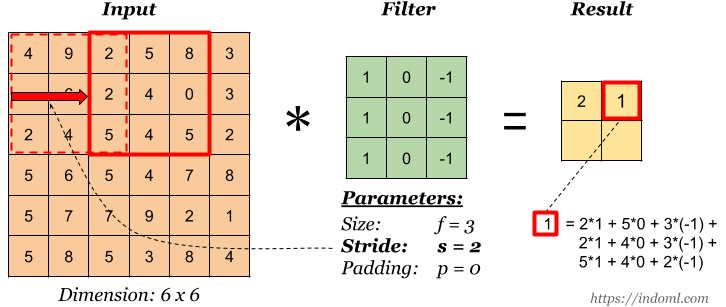

### Paremeters
- Size: How large the filter is going to be.  Notice the size of 3, this means it's a 3x3 grid
- Stride: How large of a jump it is taking.  A stride of 1 will slide the filter one square over whereas a stride of 2 will slide it two squares over.
- Padding: Creates a perimeter of zeros around the original image.

#### QUESTION:
WHAT IS THE BENEFIT OF ADDING PADDING TO THE IMAGE?

### Pooling Layer

Keeps the important information while reducing the size of larger images

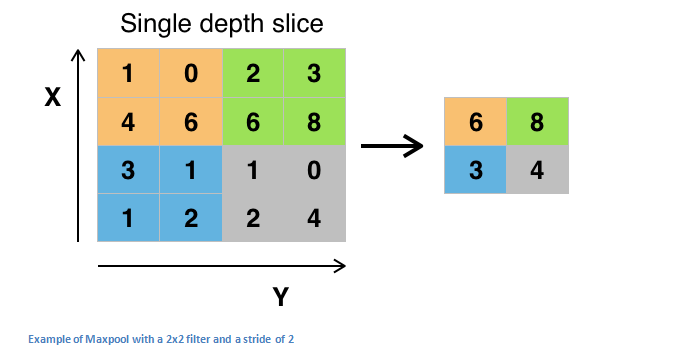

### Activation Layers

Activation layers apply to CNN just as much as they did to Dense layers.  If ReLU were applied to a CNN that had an outcome of -10.  ReLU would change the value to 0.  This ensures that images stay at pixel ranges that are possible.

### Additional CNN Reading

[Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

[Building a Convolutional Neural Network (CNN) in Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

## Augmenting Data
---

Augmenting data is changing data to make it different.  This is an excellent way to increase training data without needing to collect more.

Keras offers a super convenient way to augment images.

In addition to adding additional training data it also helps reshape the data to the exact size needed (at least the flow_from_* gives that option).

In [12]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25) # scaling is critical augmentation

In [13]:
train_gen = datagen.flow(x=X_train, y=y_train, subset='training')
valid_gen = datagen.flow(x=X_train, y=y_train, subset='validation')

In [14]:
# instantiate the model
model = Sequential()

# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
train_step_size = train_gen.n // train_gen.batch_size
valid_step_size = valid_gen.n // valid_gen.batch_size

model.fit_generator(generator=train_gen, 
                    steps_per_epoch=train_step_size,
                    validation_data=valid_gen,
                    validation_steps=valid_step_size,
                    epochs=3)

Epoch 1/3
1406/1406 [==============================] - 22s 16ms/step - loss: 0.1709 - acc: 0.9495 - val_loss: 0.0813 - val_acc: 0.9756
Epoch 2/3
1406/1406 [==============================] - 22s 15ms/step - loss: 0.0548 - acc: 0.9836 - val_loss: 0.0536 - val_acc: 0.9839
Epoch 3/3
1406/1406 [==============================] - 21s 15ms/step - loss: 0.0382 - acc: 0.9881 - val_loss: 0.0460 - val_acc: 0.9867


### How to Transform your Data

Read up on how you can use ImageDataGenerator to manipulate your data even more!

[Keras Image Data Generator](https://keras.io/preprocessing/image/)

## Apply What we Learned to Our Sea Lion Count

In [15]:
def append_ext(fn):
    return fn + ".jpg"

x_col = 'train_id'
y_col = ["adult_males", "subadult_males", "adult_females", "juveniles", "pups"]

train_df = pd.read_csv('./TrainSmall2/Train/train.csv', dtype=str)

train_df[x_col] = train_df[x_col].apply(append_ext)

datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)


train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="./TrainSmall2/Train/",
    x_col=x_col,
    y_col=y_col,
    subset="training",
    batch_size=2,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(64,64))

valid_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="./TrainSmall2/Train/",
    x_col=x_col,
    y_col=y_col,
    subset="validation",
    batch_size=1,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(64,64))

Found 8 validated image filenames.
Found 2 validated image filenames.


/Users/briancollins/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 938 invalid image filename(s) in x_col="train_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [16]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers, optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6), loss='mean_squared_error', metrics=["mae"])
model.summary()

W1001 15:00:01.251161 4505511360 deprecation.py:506] From /Users/briancollins/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        36928     
__________

In [17]:
# Fitting keras model, Note the Floor Division. Why is this needed?
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)

Epoch 1/10
4/4 [==============================] - 3s 669ms/step - loss: 4360.5028 - mean_absolute_error: 27.2664 - val_loss: 1128.1958 - val_mean_absolute_error: 19.8524
Epoch 2/10
4/4 [==============================] - 2s 392ms/step - loss: 4134.5845 - mean_absolute_error: 26.0568 - val_loss: 909.1654 - val_mean_absolute_error: 17.8625
Epoch 3/10
4/4 [==============================] - 2s 486ms/step - loss: 4066.5310 - mean_absolute_error: 26.7025 - val_loss: 811.1448 - val_mean_absolute_error: 17.8279
Epoch 4/10
4/4 [==============================] - 2s 485ms/step - loss: 3679.3418 - mean_absolute_error: 25.8320 - val_loss: 754.8637 - val_mean_absolute_error: 17.7916
Epoch 5/10
4/4 [==============================] - 2s 510ms/step - loss: 3654.7979 - mean_absolute_error: 23.4704 - val_loss: 572.2165 - val_mean_absolute_error: 18.0716
Epoch 6/10
4/4 [==============================] - 2s 492ms/step - loss: 3869.7881 - mean_absolute_error: 27.0268 - val_loss: 561.2219 - val_mean_absolute_

[516.8338317871094, 17.432578563690186]